In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.drop(['CustomerID', 'Gender'], inplace=True, axis=1)

In [6]:
data.rename(columns={'Age':'age', 'Annual Income (k$)':'annual_income', 
                     'Spending Score (1-100)':'spending_score'}, inplace=True)

In [8]:
data.head()

,age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [9]:
X =  data

# Cari K yang paling sesuai, yaitu yang setelahnya sudah tidak pengaruh signifikan

In [10]:
from sklearn.cluster import KMeans
cluster = []

for i in range(1,11):
    km = KMeans(n_clusters=i).fit(X)
    cluster.append(km.inertia_)

Text(0, 0.5, 'Inertia')

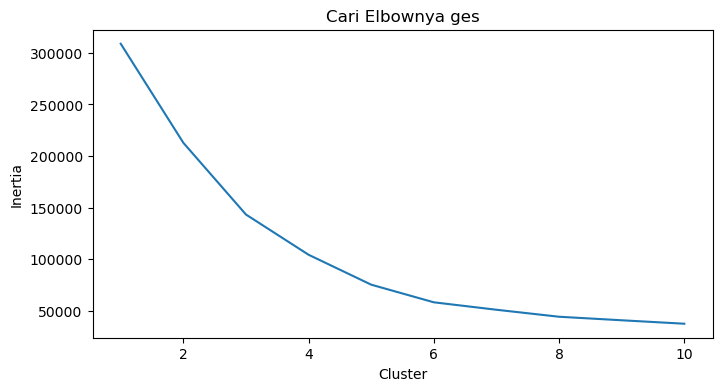

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x= [i for i in range(1,11)], y=cluster, ax =ax)
ax.set_title('Cari Elbownya ges')
ax.set_xlabel('Cluster')
ax.set_ylabel('Inertia')

In [16]:
import plotly.express as px

px.line(x=[i for i in range(1,11)], y=cluster)

### K yang paling sesuai dalam data diatas adalah 5

# Clustering dengan K=5

In [17]:
km5 = KMeans(n_clusters=5).fit(X)

In [18]:
X['labels'] = km5.labels_

In [21]:
px.scatter(data_frame=X, x='annual_income', y='spending_score', color='labels',
           color_discrete_map='rose')